# Часть I: О теореме Байеса


Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

# Пункт 1
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

События: \
H - у подсудимого редкая группа крови \
C - подсудимый виновен 


Прокурор оценил следующую веронятность:
\begin{align}
P(H | \bar C)
\end{align}
Он не прав, так как оценил вероятность выбрать человека с редкой группой крови при условии, что он невинововен. Отсюда не следуюет, что вероятностью 99% он виновен. Надо было оценить:
\begin{align}
P(C | H)
\end{align}

# Пункт 2
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

Ответ: Адвокат оценил вероятность выбрать равновероятно 1 человека  из общего числа людей с редкой группой крови.
Он должен был оценить вероятность невинности подсудимого при условии, что у убийцы редкая группа крови.

\begin{align}
P(\bar C | H) = \frac{P(H |\bar C) \cdot P(\bar C)}{P(H)}\
\end{align}

# Пункт 3
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

B - Тест положителен \
А - Пациент действительно болен \
P_B - Вероятность положительного ответа теста \
P_AB = P(A^B)

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def func_pos(false_pos=0.05, false_neg=0.05):
    P_B = (1 - false_neg) * 0.01 + false_pos * 0.99
    P_AB = (1 - false_neg) * 0.01 / P_B
    return P_AB

def func_neg(false_pos=0.05, false_neg=0.05):
    P_no_B = false_neg * 0.01 + (1 - false_pos) * 0.99
    P_no_AB = (1 - false_pos) * 0.99 / P_no_B
    return P_no_AB

x = np.linspace(0.05, 0.00, 50)

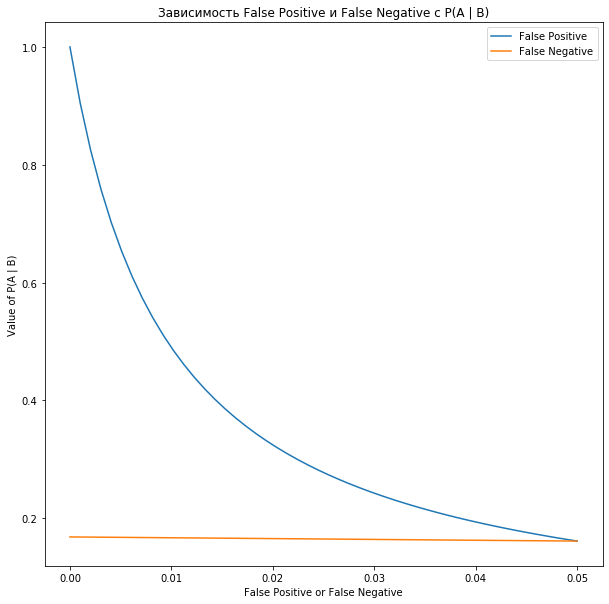

In [50]:
#Построим график зависимости от False Positive и False Negative и значением условной вероятности
#появления события А при условии что событие В произошло

pos_test_false_pos = []
pos_test_false_neg = []
for i in x:
    pos_test_false_pos.append(func_pos(false_pos=i, false_neg=0.05))
    pos_test_false_neg.append(func_pos(false_pos=0.05, false_neg=i))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Зависимость False Positive и False Negative с P(A | B)')
ax.set_xlabel('False Positive or False Negative')
ax.set_ylabel('Value of P(A | B)')
ax.plot(x, pos_test_false_pos, color='tab:blue', label='False Positive')
ax.plot(x, pos_test_false_neg, color='tab:orange', label='False Negative') 
plt.legend()
plt.show()

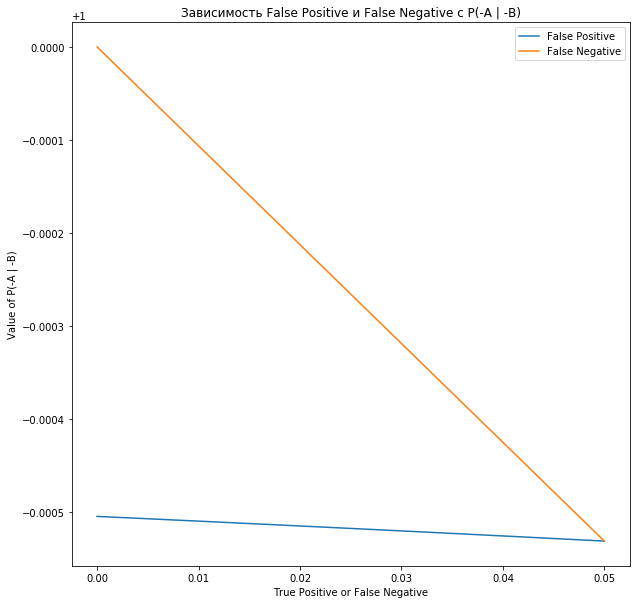

In [51]:
# Построим график зависимости от False Positive и False Negative и значением условной вероятности
# не появления события А при условии что событие В не произошло

neg_test_false_pos = []
neg_test_false_neg = []
for i in x:
    neg_test_false_pos.append(func_neg(false_pos=i, false_neg=0.05))
    neg_test_false_neg.append(func_neg(false_pos=0.05, false_neg=i))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Зависимость False Positive и False Negative с P(-A | -B)')
ax.set_xlabel('True Positive or False Negative')
ax.set_ylabel('Value of P(-A | -B)')
ax.plot(x, neg_test_false_pos, color='tab:blue', label='False Positive') # minimize False Negative'
ax.plot(x, neg_test_false_neg, color='tab:orange', label='False Negative') # minimize 'False Positive'
plt.legend()
plt.show()

In [52]:
min(neg_test_false_pos)

0.9994686503719448

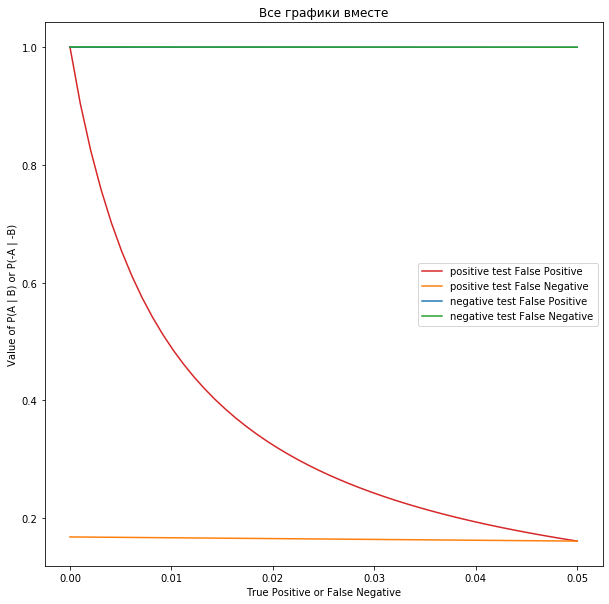

In [55]:
# Наложим 2 графика выше вместе
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Все графики вместе')
ax.set_xlabel('True Positive or False Negative')
ax.set_ylabel('Value of P(A | B) or P(-A | -B)')
ax.plot(x, pos_test_false_pos, color='tab:red', label='positive test False Positive')
ax.plot(x, pos_test_false_neg, color='tab:orange', label='positive test False Negative') 
ax.plot(x, neg_test_false_pos, color='tab:blue', label='negative test False Positive') # minimize False Negative'
ax.plot(x, neg_test_false_neg, color='tab:green', label='negative test False Negative') # minimize 'False Positive'
plt.legend()
plt.show()

## Ответ
Иследуя построенные графики, можно сделать вывод, что лучше вложить силы и деньги на понижение FALSE POSITIVE,
так как при это мы получим наибольшее улучшение качества апостериорной вероятности P(A | B). Выросло с 0.16 до 1. 
Но это произойдет за счет уменьшения числа здоровых людей, которым сказали, что они больны.
Для того чтобы не "пропустить" больных нужно все таки понизить ошибку False Negative. Тогда P(A | B) останется примерно на тех же 16 % (из-за того что % истино больных сильно меньше), но зато больных которым сказали, что они здоровы будет сильно меньше. Думаю выбор должны делать специалисты между этими вариантами. Правильней будет не пропускать больных, хоть из-за этого придется сильно больше здоровым людям делать повторный тест.
